<a href="https://colab.research.google.com/github/sangeetamteli/HelloMaven/blob/main/MP01_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project Notebook: Customer segmentation using clustering

## Dr. Prashanth Kannadaguli
### Founding Chief Research Architect & President
### Dhaarini AI-Tech Research Academy, Bengaluru, India

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

### Import Required packages

In [22]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

## Load the data

In [3]:
# YOUR CODE HERE
url = "https://docs.google.com/spreadsheets/d/1IAYH248Kv6Tt1si7T_t7KXntbVHjr85X/edit?gid=1621437338"
data = url.replace('/edit?gid=', '/export?format=csv&gid=')

df = pd.read_csv(data)
print(df.head(5))

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


## Data Pre-processing

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://kanoki.org/2020/04/23/how-to-remove-outliers-in-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [4]:
# YOUR CODE HERE

def preprocess_data(df):
    # Handle duplicates
    df.drop_duplicates(inplace=True)

    # Handle cancelled orders
    df = df[df['Quantity'] > 0]

    # Handle missing values
    df.dropna(inplace=True)

    # Handle irrelevant transactions
    irrelevant_stock_codes = ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']
    df = df[~df['StockCode'].isin(irrelevant_stock_codes)]

    # Handle outliers in UnitPrice and Quantity (using IQR method)
    def remove_outliers(df, column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    df = remove_outliers(df, 'UnitPrice')
    df = remove_outliers(df, 'Quantity')

    # Create DayOfWeek column
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

    return df

df_preprocessed = preprocess_data(df.copy()) # Apply preprocessing to a copy
display(df_preprocessed.head())

/tmp/ipython-input-354074933.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday


## Understanding new insights from the data

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

Number of free items:  24
      InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice  CustomerID         Country DayOfWeek  \
9302  2010-12-05 14:02:00        0.0     12647.0         Germany    Sunday   
33576 2010-12-16 14:36:00        0.0     16560.0  United Kingdom  Thursday   
40089 2010-12-21 13:45:00        0.0     14911.0            EIRE   Tuesday   
47068 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  Thursday   
47070 2011-01-06 16:41:00        0.0     13081.0  United Kingdom  Thursday   

       TotalAmount  
9302           0.0  
33576          0.0  
40089          0.0  
47068 

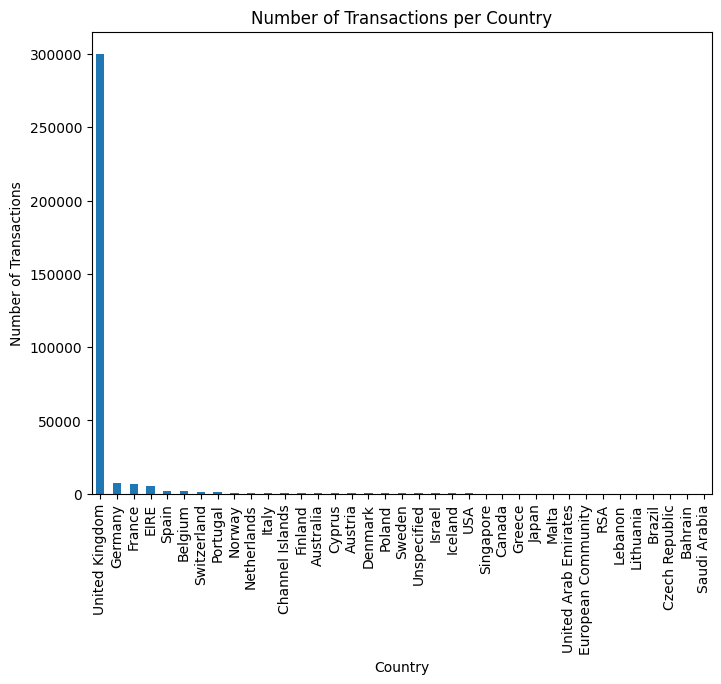

Ratio of repeaters and single time purchasers: 5203.20


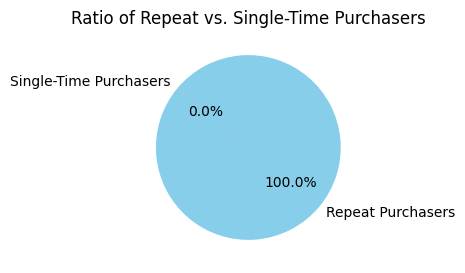

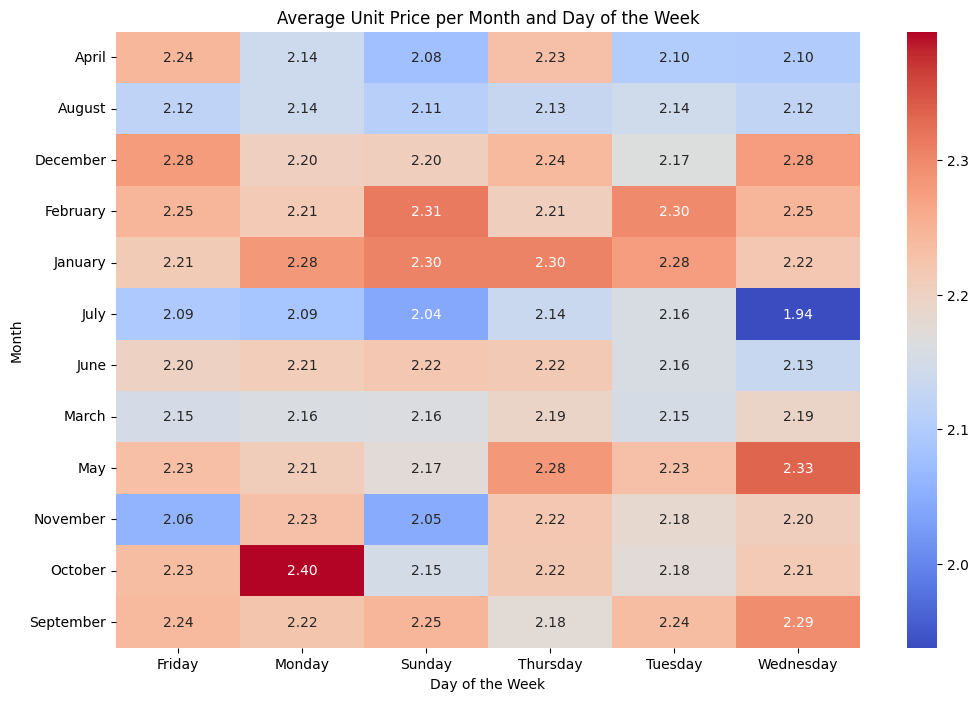

Top 10 Customers: CustomerID
14911.0    49396
13089.0    20288
17841.0    19501
14298.0    17483
12748.0    14994
           ...  
16454.0        2
14795.0        1
15423.0        1
17788.0        1
16429.0        1
Name: Quantity, Length: 4191, dtype: int64
Top 10 Customers: StockCode
21212     14986
84879     13574
85099B    12167
85123A    10809
20725      9776
22197      8946
23203      8908
22961      8671
21977      8498
84991      8376
Name: Quantity, dtype: int64


In [53]:
# YOUR CODE HERE
free_items= df_preprocessed[df_preprocessed['UnitPrice']==0]
print("Number of free items: ", str(len(free_items)))
print(free_items.head())

transaction= df_preprocessed['Country'].value_counts()
print(transaction)
plt.figure(figsize=(8,6))
transaction.plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.show()

customer_count=df_preprocessed['CustomerID'].value_counts()
repeaters_count=customer_count[customer_count>1].sum()
single_time_count=customer_count[customer_count==1].sum()
print(f"Ratio of repeaters and single time purchasers: {repeaters_count/single_time_count:.2f}")
labels = ['Repeat Purchasers', 'Single-Time Purchasers']
sizes = [repeaters_count, single_time_count]
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Repeat vs. Single-Time Purchasers')
plt.show()

agg = df_preprocessed.groupby([df_preprocessed['InvoiceDate'].dt.month_name(), df_preprocessed['DayOfWeek']])['UnitPrice'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(agg, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Average Unit Price per Month and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.show()

top_customers=df_preprocessed.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False)
top_customers.columns = ['CustomerID', 'TotalQuantity']
print("Top 10 Customers:",top_customers.head(10))

top_items=df_preprocessed.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)
top_items.columns = ['CustomerID', 'TotalQuantity']
print("Top 10 Customers:",top_items.head(10))

## Feature Engineering and Transformation

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [41]:
# YOUR CODE HERE
df_preprocessed['TotalAmount'] = df_preprocessed['Quantity'] * df_preprocessed['UnitPrice']
print(df_preprocessed.head(5))

customer_data = df_preprocessed.groupby('CustomerID').agg({
    'InvoiceNo': 'count',
    'InvoiceDate': 'max',
    'TotalAmount': 'sum'
})
display(customer_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  DayOfWeek  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  Wednesday   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  Wednesday   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  Wednesday   

   TotalAmount  
0        15.30  
1        20.34  
2        22.00  
3        20.34  
4        20.34  


,InvoiceNo,InvoiceDate,TotalAmount
CustomerID,,,
12347.0,166,2011-12-07 15:52:00,3314.73
12348.0,6,2011-04-05 10:47:00,90.20
12349.0,58,2011-11-21 09:51:00,999.15
12350.0,16,2011-02-02 16:01:00,294.40
12352.0,66,2011-11-03 14:37:00,1130.94


### Scale the data

Apply `StandardScaler` on the features.

In [43]:
# YOUR CODE HERE for scaling
from sklearn.preprocessing import StandardScaler
customer_data['InvoiceDate_numeric'] = pd.to_datetime(customer_data['InvoiceDate']).astype(int) / 10**9  # invoiceDate is in dateTime format we cant scale that directly , /10**9 -> after converting to int its in nanoseconds
features_to_scale = ['InvoiceDate_numeric', 'TotalAmount']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[features_to_scale])
print(scaled_data)

[[ 0.90247069  1.04063659]
 [-1.56202661 -0.42531283]
 [ 0.73980671 -0.01208215]
 ...
 [ 0.85069153 -0.4148883 ]
 [ 0.89086226  0.44141915]
 [ 0.49942186 -0.02953517]]


## Clustering

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

[[ 0.57552364 -0.08273423]
 [-2.02914448 -0.34460088]
 [ 0.88592694 18.98585736]
 [ 0.7926981   1.95046592]
 [-0.65428839 -0.26888563]]


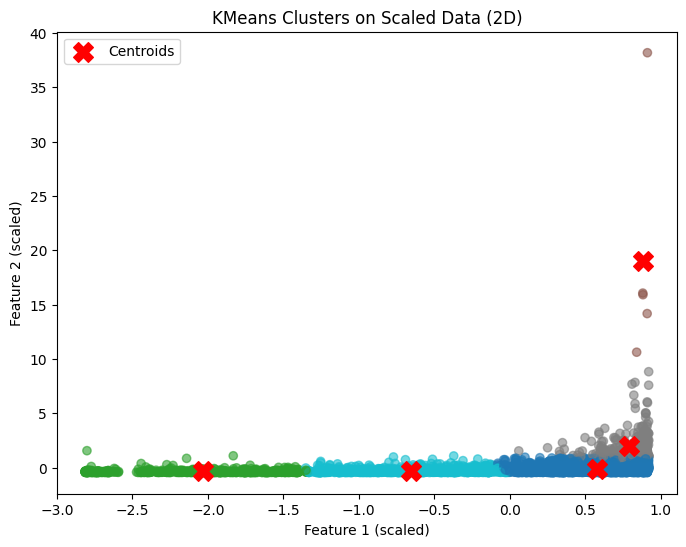

In [70]:
# YOUR CODE HERE to apply KMeans
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(8,6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('KMeans Clusters on Scaled Data (2D)')
plt.legend()
plt.show()

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

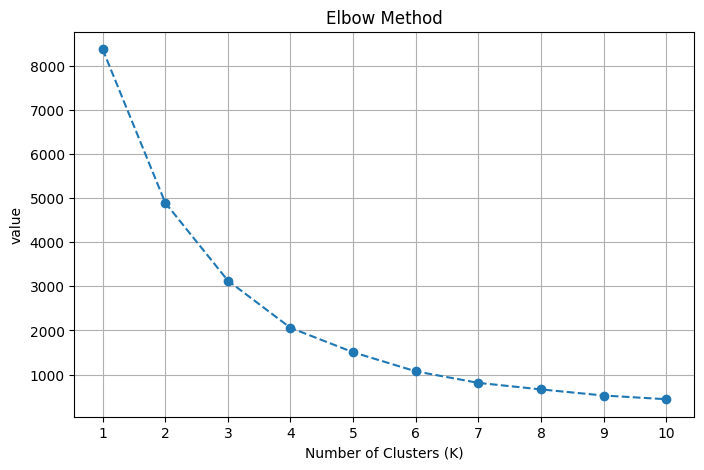

In [55]:
# YOUR CODE HERE
from sklearn.cluster import KMeans
array=[]
for i in range(1, 11):
  kmeans=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=123)
  kmeans.fit(scaled_data)
  array.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), array, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('value')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?

# Type your answers here

1.Removing the missing values:

Pros: Ensures analysis is based only on actual observed data, avoiding
assumptions.

  Prevents distortion caused by potentially inaccurate imputation.

  Simplifies dataset by eliminating uncertain entries.

Cons:May introduce bias if missing data is not completely random.

  Loss of potentially valuable information that could be recovered through imputation.

Replacing with mean value

Pros:Preserves dataset size by filling missing entries.

Simple and fast method of imputation.

Helps maintain statistical properties like mean and variance in some cases

Cons:Mean imputation can reduce variance and underestimate data variability.

Ignores the relationship between variables; may distort correlations.

Can lead to biased results if data is not missing completely at random.

2.Clusters:

Cluster 1: Represents customers with low purchase frequency and low spending — possibly casual buyers or one-time purchasers.

Cluster 2: Shows higher purchase quantities and total spending — likely loyal or bulk buyers.

Cluster 3: Customers with moderate purchase frequency but higher unit prices — may prefer premium or expensive products.

Cluster 4: Smaller cluster possibly representing outliers or niche buyers with very high spending or unusual buying behavior.

Cluster 5: Indicates customers with regular purchases but smaller quantities — maybe subscription or recurring buyers.

3.Other methods could be used to determine the optimal no. of clusters are Silhouette Score and Gap statistic.